# CSC8001: Assignment 2
## Part B [50 marks]

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

## B1: Fuel efficiency [25 total marks]
For this problem we're going to use the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Auto MPG Data set to explore the association between a car's horsepower and its fuel efficiency.

### B1.1 Load data [5 marks]
For the `b11()` function below: load the Auto MPG data into a Data Frame, clean data as required, and return the Data Frame. 

The `auto-mpg.data` data file and its data description, `auto-mpg.names`, are available in the assignment data folder.  Be sure to read the data description file.  Use the `Attribute` names provided in `auto-mpg.names` for your Data Frame's column names.  For two word attribute names use the 2nd word: `year` for `model year` and `name` for `car name`.

In [76]:
def b11():
    """ function b11 returns a dataframe based on the auto_mpg data set after some cleaning of the data
     
    returns: dataframe
    """
    import csv
    
    with open('data/auto_mpg.txt', 'r', encoding = 'utf8', newline='') as file_in:
        list_out = []
        for row in file_in:
            if '?' not in row:
                row = row.replace('"',' ')
                list_row = row.split()
                mpg =          float(list_row[0])
                cylinders =      int(list_row[1])
                displacement = float(list_row[2])
                horsepower =   float(list_row[3])
                weight =       float(list_row[4][0:4])
                acceleration = float(list_row[5])
                year =           int(list_row[6])
                origin =         int(list_row[7])
                name =      ' '.join(list_row[8:])
                line_item = (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name)
                list_out.append(line_item)
        with open('data/auto_mpg2.txt', 'w', encoding = 'utf8', newline='') as file_out:
            writer = csv.writer(file_out, delimiter=',')
            for mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name in list_out:
                writer.writerow([mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name])
        global df_auto_mpg        
        df_auto_mpg = pd.read_csv('data/auto_mpg2.txt', 
                               names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
                                        'year', 'origin', 'name'])
    return df_auto_mpg

In [77]:
auto = b11()
auto.shape

(392, 9)

### B1.2 Multi-axes histogram chart [10 marks]
To help us explore the association between a car's horsepower and its fuel efficiency, create a multi-axes histogram chart plotting `horsepower` vs `mpg`. 

The `b12()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame  
- use `seaborn-whitegrid` style, just for this b12 plot  
- create a plot similar to the one shown below

*Hint: Review the PyDSHB notebooks: 04.11 Settings and Stylesheets and 04.08 Multiple Subplots*.

<img src="b12.PNG" width=488 height=375 align=left />

In [78]:
def b12():
    """ function b12 takes function b11 dataframe as input to produce a scatterplot with x and y axis histograms
     
    returns: matplot figure
    """
    b11()
    fig = plt.figure(figsize = (8, 8))
    grid = plt.GridSpec(4, 4, hspace = 0.22, wspace = 0.25)

    main_ax = fig.add_subplot(grid[1:, :3])
    plt.xlabel('Horsepower', labelpad = 12)
    plt.ylabel('Miles per Gallon [mpg]', labelpad = 12)
    main_ax.xaxis.set_major_locator(plt.MultipleLocator(25))
    plt.grid(True)
    main_ax.set_axisbelow(True)

    y_hist = fig.add_subplot(grid[1:, 3:], xticklabels = [], sharey = main_ax)
    plt.xlabel('mpg', labelpad = -349)
    plt.grid(True)
    y_hist.set_axisbelow(True)
    
    x_hist = fig.add_subplot(grid[:1, 0:3], yticklabels=[], sharex=main_ax)
    plt.ylabel('Horsepower')
    plt.grid(True)
    x_hist.set_axisbelow(True)

    plt.title('Fuel Efficiency: Horsepower vs Miles per Gallon', size = 14, y = 1.1)

    main_ax.plot(df_auto_mpg.horsepower, df_auto_mpg.mpg, 'o', c = 'royalblue', markersize=3, alpha=0.5)

    x_hist.hist(df_auto_mpg.horsepower, 20, histtype = 'stepfilled', orientation = 'vertical', color = 'royalblue')

    y_hist.hist(df_auto_mpg.mpg, 20, histtype = 'stepfilled', orientation = 'horizontal', color = 'royalblue')


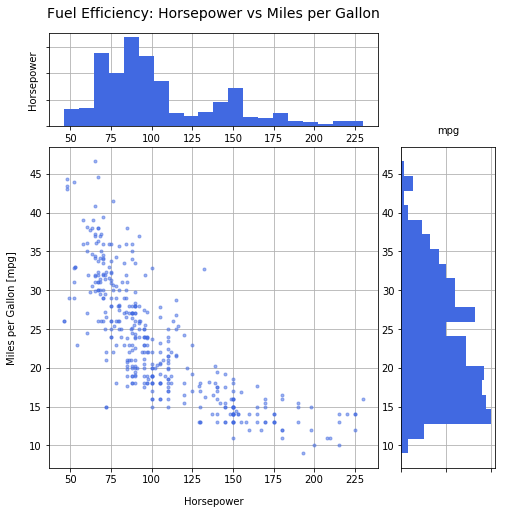

In [79]:
b12()

### B1.3: Two-dimensional histogram [10marks]
Continuing our explorations into the association between a car's horsepower and its fuel effiecincy:

The `b13()` function should:
- call the `b11()` function to retrieve the auto-mpg Data Frame 
- use Matplotlib's `hist2d()` function to generate a two-dimensional histogram of `mpg` vs `horsepower`.  

Additional plot criteria:
  - Plot `horsepower` on the horizontal axis and `mpg` along the vertical axis.
  - Figure size: 10 by 5
  - 25 bins
  - Plot range values for horsepower between 40 and 235, and mpg between 5 and 50.
   - Colorbar with an appropriate color map
   - Appropriate labels


In [80]:
def b13():
    """ function b13  takes function b11 as input to produce a two-dimensional histogram
     
    returns: matplot figure
    """
    fig = plt.figure(figsize = (10, 5))
    plt.hist2d(df_auto_mpg.horsepower, df_auto_mpg.mpg, bins = 25, cmap = 'Blues')
    plt.title('Fuel Efficiency: Horsepower vs Miles per Gallon', size = 14, y = 1.03)
    plt.xlabel('Horsepower', labelpad = 12)
    plt.ylabel('Miles per Gallon [mpg]', labelpad = 12)

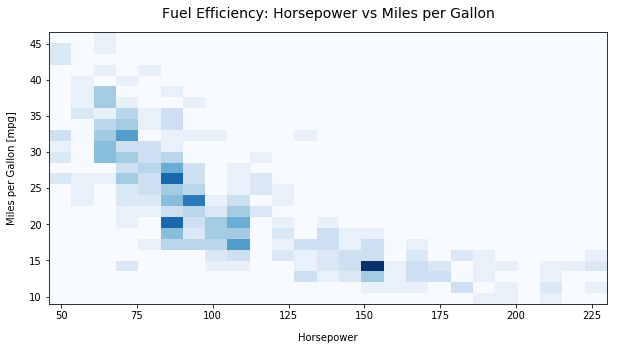

In [81]:
b13()

## B2: Birthdays [25 total marks]
For this problem we will be analysing and visualising U.S. birth data as an homage to Matt Stiles's ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/) article.  Our chart will use the  birth data gathered by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/births) [[CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)]: 

There are two birth data files, both available in the assignment `data` folder:

- `US_births_1994-2003_CDC_NCHS.csv`: <br>
   Births from 1994 to 2003 (Centers for Disease Control and   Prevention's National Center for Health Statistics)

- `US_births_2000-2014_SSA.csv`: <br>
   Births from 2000 to 2014 (Social Security Administration)

Both files have the following structure:

| year |	month |	date_of_month |	day_of_week	 | births |
|:---|:---|:---|:---|:---|
| 1994 |	1 |	1 |	6 |	8096 |
 |1994 |	1 |	2 |	7 |	7772 |
 |1994 |	1 |	3 |	1 |	10142 |
 |1994 |	1 |	4 |	2 |	11248 |


### B2.1 Load data [10 marks]
Complete the `b21()` function below which should provide the following functionality:
- Load data from the two files into one Data Frame and clean as required.
- Return a Data Frame with multiple indexes for `month` and `date_of_month` and a `births` column which has the average daily births from 1994-2014. See `b21().tail()` output below. *Hint: Review the PyDSHB notebook: *03.05 Hierarchical Indexing*.

<img src="b21.PNG" width=221 height=199 align=left />


In [82]:
def b21():
    """ function b21 takes data set US_births_1994-2003_CDC_NCHS.csv and, after data cleaning, produces a dataframe
     
    returns: dataframe
    """
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import numpy as np
    import pandas as pd
    import csv

    df_births_1994_2003 = pd.read_csv('data/US_births_1994-2003_CDC_NCHS.csv')
    date_condition = df_births_1994_2003['year'] < 2000
    df_births_1994_1999 = df_births_1994_2003.loc[date_condition]
    df_births_2000_2014 = pd.read_csv('data/US_births_2000-2014_SSA.csv')
    global df_births_1994_2014_a
    df_births_1994_2014_a = pd.concat([df_births_1994_1999, df_births_2000_2014])
    del df_births_1994_2014_a['day_of_week']
    del df_births_1994_2014_a['year']
    global df_births_1994_2014_b
    df_births_1994_2014_b = df_births_1994_2014_a.groupby(['month', 'date_of_month']).mean()
    return df_births_1994_2014_b

In [83]:
b21().tail()

births
month date_of_month              
12    27             11724.476190
      28             11901.000000
      29             12003.904762
      30             11932.238095
      31             10433.380952

### B2.2 Plot data [15 marks]
Create a heatmap style plot similar to the one shown below from Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/). *HINT: You may find these resources helpful: [Creating annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) and PyDSHB: 04.07 Customizing Colorbars*

Additional criteria:
 - Use `b21()` function to load data 
 - Add appropriate labels. 
   - X-axis labels should be on the top of the plot.
 - Distribution of average daily births per month/day should be similar to article's.
 - For the color bar select the appropriate discrete values and color limits. Indicate out-of-bounds values with a triangular arrow.
    - Do not need to duplicate article's color map or colorbar placement. 


<img src="b22.PNG" width=738 height=343 align=left/> <br>

In [84]:
def b22():
    """ function b22 takes dataframe from function b21 and produces a heatmap visualisation
     
    returns: matplot figure
    """
    info = df_births_1994_2014_b.unstack()
    fig = plt.figure(figsize = (15,5.5))
    ax = plt.axes()
    plt.title('U.S. Average Daily Births: 1994-2014', size = 13, y = 1.1)
    plt.xlabel('Date of month', labelpad = 12)
    plt.ylabel('Month', labelpad = 12)
    plt.imshow(info, cmap = plt.cm.get_cmap ('Greens', 20))
    plt.colorbar(extend = 'both');
    plt.clim(6000, 12000)
    
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, 
                    right = False, labelbottom = False, labeltop = True, labelleft = True)
    
    date_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                   16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
    plt.xticks(df_births_1994_2014_a.date_of_month.unique()-1, date_labels)
    ax.set_xticklabels(date_labels)
    
    month_labels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 
                    'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
    plt.yticks(df_births_1994_2014_a.month.unique()-1, month_labels)
    ax.set_yticklabels(month_labels)



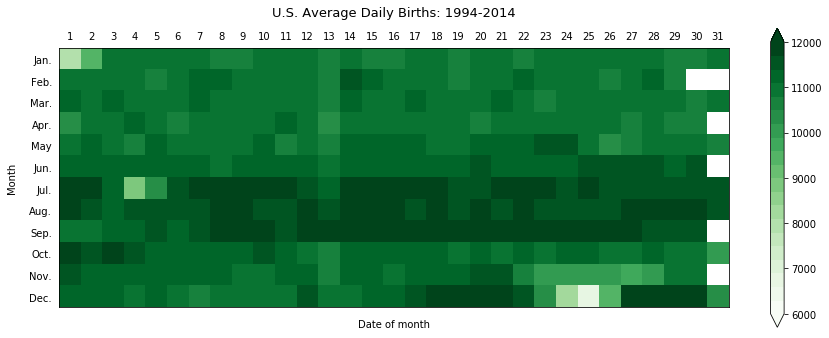

In [85]:
b22()


---------------- **End of Part B** ---------------------


Parts of this assignment were based on/adapted from:
- "Some People Are Too Superstitious To Have A Baby On Friday The 13th", [FiveThirtyEight](https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/), 13 May 2016.
- "How Common is Your Birthday", [The Daily Viz](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/), Matt Stiles, September 17, 2016